In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-85.11813203460557 -26.444419202353316
37.87271734328648 -21.06734200613502
-87.23344348842666 -168.56682621950145
12.937875425193653 19.5579437740017
22.021941166253868 -34.44031325199475
10.595846287997205 -0.08056804708712662
1.0765551614073132 82.76803894722144
42.543102451820715 -141.07415928717032
-35.60176874175912 159.95603915914194
-87.45982297153982 -60.470970283321435
75.47784240141877 64.35495311796325
67.90244829780332 -74.44541889605742
68.3975343197674 86.51386757710719
70.25383260053155 10.831607794173095
-10.984167751934024 17.461466247017825
-42.017825817717075 147.29858552740575
-21.464370230819014 -162.0339514838762
-36.84632538375432 119.40754292857326
-44.60894002251899 2.1669928387896107
28.505044267982612 128.57728750860622
26.498705781823077 157.10630071036695
-34.173773817043795 12.036189546545529
27.433998531524168 -142.31747231625025
-35.26873494135343 -20.841526711542457
-11.758821019458068 36.86502879136151
41.93063244619711 72.727034828554
13.549625594883

51.176299472366026 -64.90797441813613
-53.971518376463514 98.47784084909426
-63.724031165372764 136.05253151349638
-20.737981697512467 92.21882419434729
0.740683894662979 130.07713326118653
-72.12301820994578 -70.99121936136832
23.493916320224983 150.94487608569375
-25.725560135003448 85.40409700095631
-80.17682688613674 -46.601743893488134
-5.224761430994249 41.069498980764166
-45.37859413891053 -53.0706798405285
26.23476094184622 -84.76760764569113
27.71458684087348 -77.66799650159082
-1.6806960944414442 -138.72668577822446
27.57240879536849 96.41779733718437
-12.065204011594844 -9.507895558701364
-14.736082866539206 100.59549769971699
-16.39743166991542 -121.17502891727662
64.84950941886925 -79.68473474319129
21.249999857180555 147.70730084420256
15.3249441628503 9.324790817915215
38.527984263517965 57.37171868818464
-59.53501470503993 35.71459644663551
82.43438786629187 124.32956448341832
31.550774316663762 -35.025418844284104
-88.89779708433063 91.17929449526423
-74.4639097927001 

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=860e3ced87067e9f2a82b17770a4d68a


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | vila franca do campo
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | oum hadjer
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | dapaong
Processing Record 7 of Set 1 | hambantota
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | port macquarie
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | igarka
Processing Record 13 of Set 1 | sorland
Processing Record 14 of Set 1 | camacupa
Processing Record 15 of Set 1 | launceston
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | naze
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Set 1 | sao joao da barra
Processing Record 24 of

Processing Record 40 of Set 4 | havoysund
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | hwange
Processing Record 43 of Set 4 | calvinia
Processing Record 44 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 45 of Set 4 | faya
Processing Record 46 of Set 4 | ahipara
Processing Record 47 of Set 4 | honningsvag
Processing Record 48 of Set 4 | usogorsk
Processing Record 49 of Set 4 | los llanos de aridane
Processing Record 50 of Set 4 | toamasina
Processing Record 1 of Set 5 | gat
Processing Record 2 of Set 5 | ust-kuyga
Processing Record 3 of Set 5 | tucumcari
Processing Record 4 of Set 5 | yumen
Processing Record 5 of Set 5 | mayumba
Processing Record 6 of Set 5 | general roca
Processing Record 7 of Set 5 | poum
Processing Record 8 of Set 5 | asfi
Processing Record 9 of Set 5 | paragould
Processing Record 10 of Set 5 | dvinskoy
Processing Record 11 of Set 5 | norman wells
Processing Record 12 of Set 5 | leningradskiy
Processing Record 13 of Set

Processing Record 29 of Set 8 | kaduqli
Processing Record 30 of Set 8 | jeremie
Processing Record 31 of Set 8 | omsukchan
Processing Record 32 of Set 8 | hornepayne
Processing Record 33 of Set 8 | wattegama
Processing Record 34 of Set 8 | shu
Processing Record 35 of Set 8 | pontes e lacerda
Processing Record 36 of Set 8 | bytow
Processing Record 37 of Set 8 | balabac
Processing Record 38 of Set 8 | anadyr
Processing Record 39 of Set 8 | liberty
Processing Record 40 of Set 8 | arlit
Processing Record 41 of Set 8 | raudeberg
Processing Record 42 of Set 8 | villanueva de la serena
Processing Record 43 of Set 8 | netrakona
Processing Record 44 of Set 8 | kalmunai
Processing Record 45 of Set 8 | agulu
Processing Record 46 of Set 8 | saurimo
Processing Record 47 of Set 8 | narsaq
Processing Record 48 of Set 8 | waitati
Processing Record 49 of Set 8 | nikolskoye
Processing Record 50 of Set 8 | carnarvon
Processing Record 1 of Set 9 | atambua
Processing Record 2 of Set 9 | inhapim
Processing R

Processing Record 17 of Set 12 | inverell
Processing Record 18 of Set 12 | talnakh
Processing Record 19 of Set 12 | tripoli
Processing Record 20 of Set 12 | krasnogvardeyets
Processing Record 21 of Set 12 | oga
Processing Record 22 of Set 12 | bilibino
Processing Record 23 of Set 12 | belyy yar
Processing Record 24 of Set 12 | ust-maya
Processing Record 25 of Set 12 | saint-pierre
Processing Record 26 of Set 12 | hualmay
Processing Record 27 of Set 12 | quang ngai
Processing Record 28 of Set 12 | isiro
Processing Record 29 of Set 12 | keshod
Processing Record 30 of Set 12 | hearst
Processing Record 31 of Set 12 | adrar
Processing Record 32 of Set 12 | xuanhua
Processing Record 33 of Set 12 | faranah
Processing Record 34 of Set 12 | ibra
Processing Record 35 of Set 12 | port-gentil
Processing Record 36 of Set 12 | burns lake
Processing Record 37 of Set 12 | sungai udang
Processing Record 38 of Set 12 | dunedin
Processing Record 39 of Set 12 | necochea
Processing Record 40 of Set 12 | su

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,31.66,80,20,2.30,AR,2022-07-14 06:17:38
1,Vila Franca Do Campo,37.7167,-25.4333,68.20,88,90,10.18,PT,2022-07-14 06:19:09
2,Vaini,-21.2000,-175.2000,76.57,86,0,16.67,TO,2022-07-14 06:19:09
3,Oum Hadjer,13.2954,19.6966,77.09,74,100,7.40,TD,2022-07-14 06:19:09
4,Ponta Do Sol,32.6667,-17.1000,66.70,75,17,0.76,PT,2022-07-14 06:19:10
5,Dapaong,10.8639,0.2050,73.56,86,85,7.76,TG,2022-07-14 06:19:10
6,Hambantota,6.1241,81.1185,87.24,60,37,24.81,LK,2022-07-14 06:19:10
7,Sitka,57.0531,-135.3300,53.49,94,100,9.22,US,2022-07-14 06:19:11
8,Port Macquarie,-31.4333,152.9167,58.89,83,60,17.40,AU,2022-07-14 06:19:11
9,Clyde River,70.4692,-68.5914,32.23,100,0,5.75,CA,2022-07-14 06:19:11


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp",'Humidity',"Cloudiness", "Wind Speed"]

In [14]:
city_data_df= city_data_df[new_column_order]

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

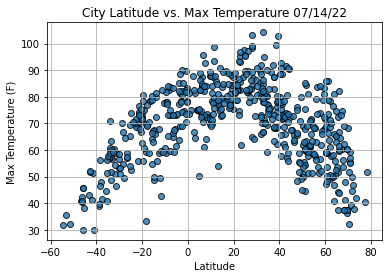

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

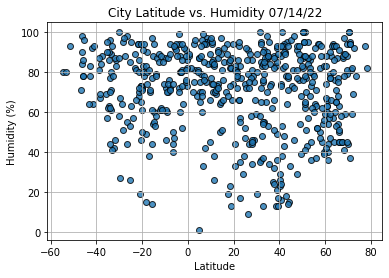

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

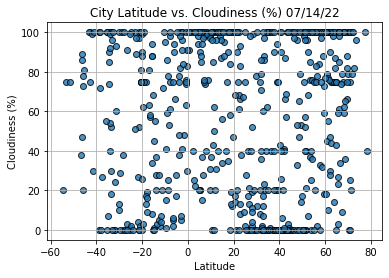

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

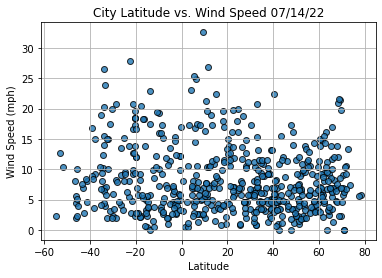

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (755688848.py, line 3)

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                   Launceston
Country                        AU
Date          2022-07-14 06:14:34
Lat                        -41.45
Lng                      147.1667
Max Temp                    51.44
Humidity                       64
Cloudiness                     30
Wind Speed                   8.05
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >=0

0      False
1       True
2      False
3       True
4       True
       ...  
561    False
562    False
563    False
564     True
565    False
Name: Lat, Length: 566, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Vila Franca Do Campo,PT,2022-07-14 06:19:09,37.7167,-25.4333,68.20,88,90,10.18
3,Oum Hadjer,TD,2022-07-14 06:19:09,13.2954,19.6966,77.09,74,100,7.40
4,Ponta Do Sol,PT,2022-07-14 06:19:10,32.6667,-17.1000,66.70,75,17,0.76
5,Dapaong,TG,2022-07-14 06:19:10,10.8639,0.2050,73.56,86,85,7.76
6,Hambantota,LK,2022-07-14 06:19:10,6.1241,81.1185,87.24,60,37,24.81
...,...,...,...,...,...,...,...,...,...
554,Suarez,CO,2022-07-14 06:33:44,2.9540,-76.6964,64.67,96,100,1.14
556,Qasigiannguit,GL,2022-07-14 06:33:45,68.8193,-51.1922,41.25,89,65,2.26
557,Natchitoches,US,2022-07-14 06:33:45,31.7668,-93.1335,72.45,94,40,5.75
559,Orotukan,RU,2022-07-14 06:33:46,62.2667,151.7000,71.29,59,28,15.55


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Vila Franca Do Campo,PT,2022-07-14 06:19:09,37.7167,-25.4333,68.20,88,90,10.18
3,Oum Hadjer,TD,2022-07-14 06:19:09,13.2954,19.6966,77.09,74,100,7.40
4,Ponta Do Sol,PT,2022-07-14 06:19:10,32.6667,-17.1000,66.70,75,17,0.76
5,Dapaong,TG,2022-07-14 06:19:10,10.8639,0.2050,73.56,86,85,7.76
6,Hambantota,LK,2022-07-14 06:19:10,6.1241,81.1185,87.24,60,37,24.81


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

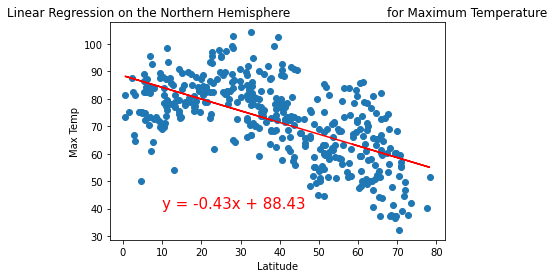

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

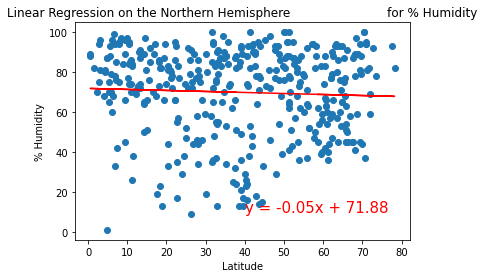

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

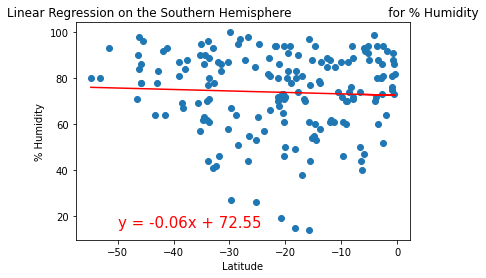

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

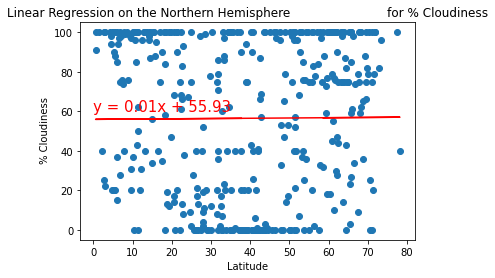

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', ' % Cloudiness',(0,60))

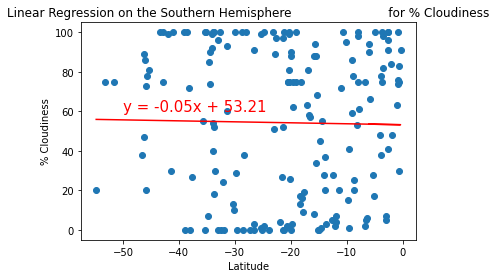

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

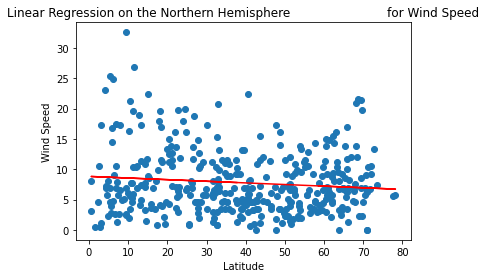

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

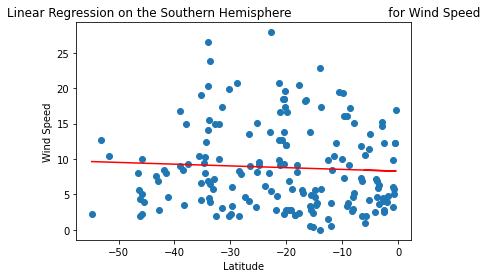

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))